A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas? 

Las columnas con mayor correlación son las siguientes:  Passes -- Passes completed -- Touches    

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

# se buscan las columnas que son de tipo string por tener un símbolo de porcentaje
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [2]:
# se eliminan de las columnas los símbolos '%' con el fin de transformarlas en tipo float
df['Shooting Accuracy (%)'] = df['Shooting Accuracy'].apply(lambda x: float(x.replace('%', '')))
df['Passing Accuracy (%)'] = df['Passing Accuracy'].apply(lambda x: float(x.replace('%', '')))
df['Goals-to-shots (%)'] = df['% Goals-to-shots'].apply(lambda x: float(x.replace('%', '')))
df['Saves-to-shots (%)'] = df['Saves-to-shots ratio'].apply(lambda x: float(x.replace('%', '')))
df.drop(columns= ['Shooting Accuracy', 'Passing Accuracy', 'Saves-to-shots ratio', '% Goals-to-shots'], inplace=True)
df

,Team,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,...,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,Shooting Accuracy (%),Passing Accuracy (%),Goals-to-shots (%),Saves-to-shots (%)
0,Croatia,4,13,12,32,0,0,0,2,1076,...,2,9,0,9,9,16,51.9,76.9,16.0,81.3
1,Czech Republic,4,13,18,39,0,0,0,0,1565,...,8,7,0,11,11,19,41.9,78.1,12.9,60.1
2,Denmark,4,10,10,27,1,0,0,3,1298,...,8,4,0,7,7,15,50.0,83.3,20.0,66.7
3,England,5,11,18,40,0,0,0,3,1488,...,6,5,0,11,11,16,50.0,80.6,17.2,88.1
4,France,3,22,24,65,1,0,0,0,2066,...,5,6,0,11,11,19,37.9,87.2,6.5,54.6
5,Germany,10,32,32,80,2,1,0,2,2774,...,12,4,0,15,15,17,47.8,87.4,15.6,62.6
6,Greece,5,8,18,32,1,1,1,0,1187,...,12,9,1,12,12,20,30.7,76.7,19.2,65.1
7,Italy,6,34,45,110,2,0,0,2,3016,...,16,16,0,18,18,19,43.0,83.9,7.5,74.1
8,Netherlands,2,12,36,60,2,0,0,0,1556,...,3,5,0,7,7,15,25.0,88.7,4.1,70.6
9,Poland,2,15,23,48,0,0,0,1,1059,...,3,7,1,7,7,17,39.4,80.4,5.2,66.7


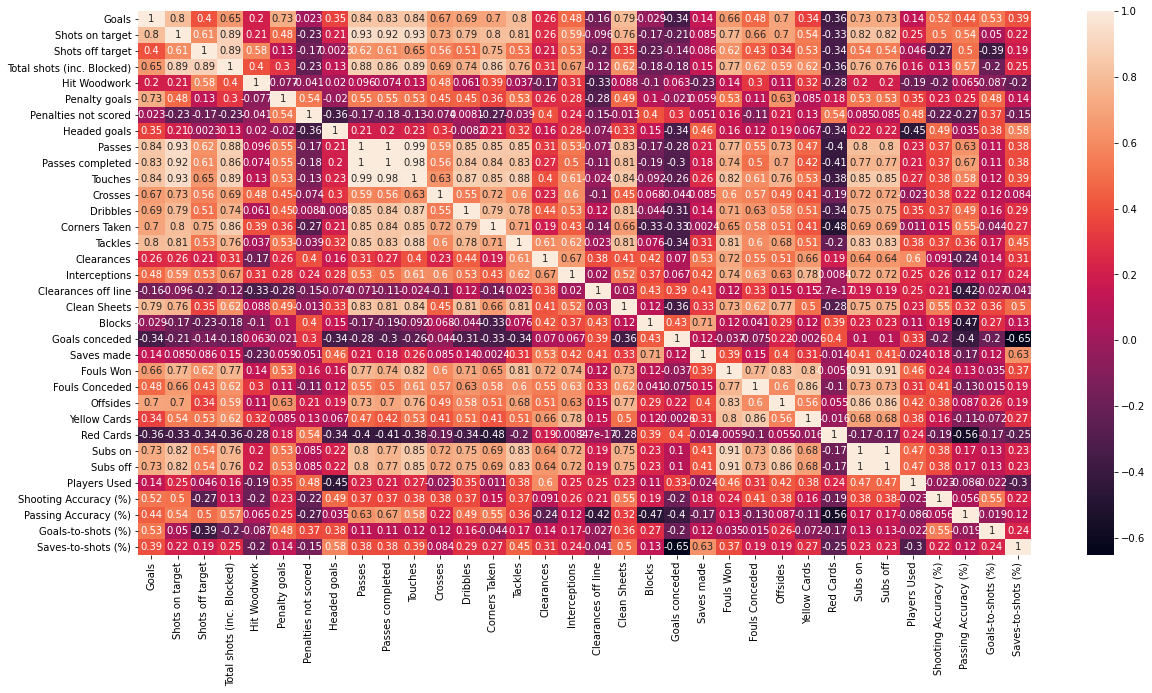

In [3]:
corrMatrix = df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

Pese a que la correlación de ambas variables sea de 0'52, no se puede concluir que haya una relación entre ambas variables que se pueda modelar. Por un lado los modelos lineales dan un error demasiado alto, y los métodos polinómicos o svr ajustan el modelo a los valores de la muestra, provocando un overfitting que genera un modelo no generalista. No se puede concluir que haya un incremento de goles fijo por un incremento de porcentaje de acierto fijo.



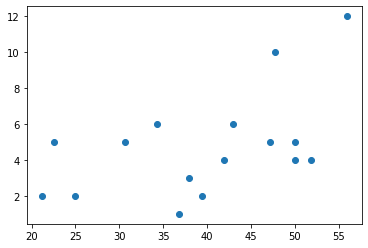

In [4]:
x = df['Shooting Accuracy (%)']
y_plt = df['Goals']
plt.scatter(x,y_plt)
plt.show()

score: 0.16960974461873224


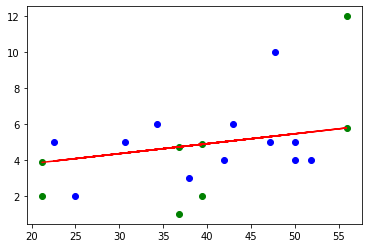

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = np.array(x).reshape(-1,1)
y = np.array(y_plt)

lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1111) #random_state aprox seed
model_linReg = lin_reg.fit(X_train,y_train)

print("score: " +str(lin_reg.score(X,y)))
y_pred = model_linReg.predict(X_test)
plt.plot(X, lin_reg.predict(X), color='red')
plt.scatter(X_train,y_train, color='blue')
plt.scatter(X_test,y_pred, color='green')
plt.scatter(X_test,y_test, color='green')
plt.show()

Degree 0
Score: 0.0


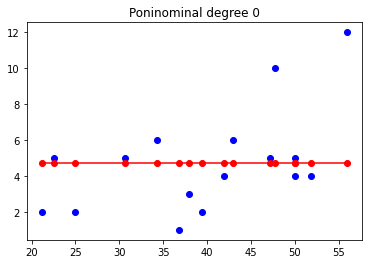

Degree 1
Score: 0.2716593767213702


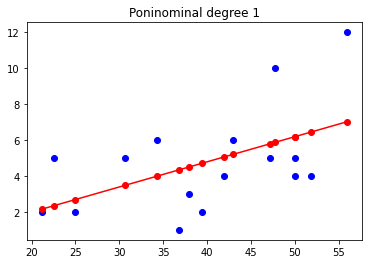

Degree 2
Score: 0.3848035265416202


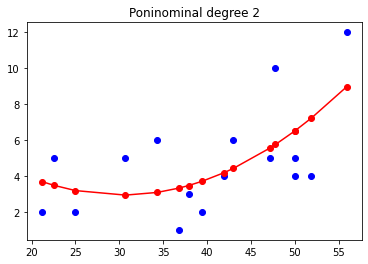

Degree 3
Score: 0.4443383420925049


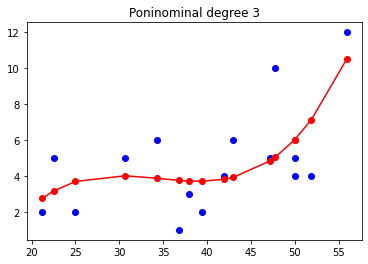

Degree 4
Score: 0.44870222345293276


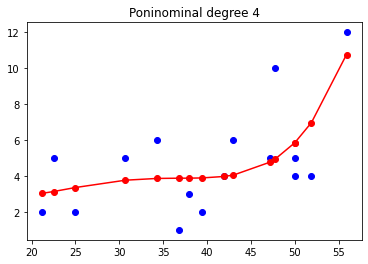

Degree 5
Score: 0.5070357345509205


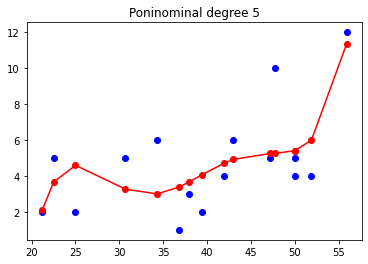

Degree 6
Score: 0.6830674447879347


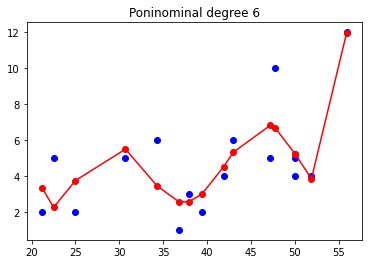

Degree 7
Score: 0.7265592932974408


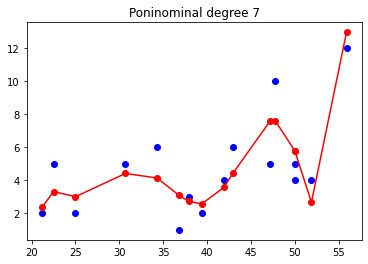

Degree 8
Score: 0.7204788130149833


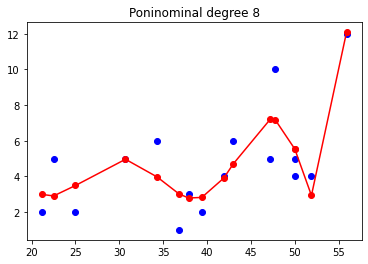

Degree 9
Score: 0.7193846957276334


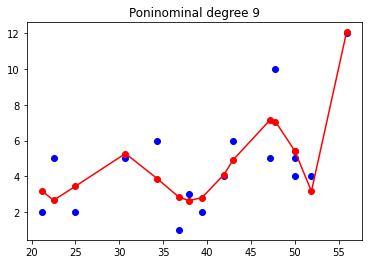

In [6]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

for i in range(10):
    polinominal_model = PolynomialFeatures(i) 
    # para cada variable tendrá tantos coeficientes como grados, es un paso necesario antes de entrenar el modelo de regresión con el fit
    X_poly = polinominal_model.fit_transform(X, y)
    
    # Llamar a la regresión lineal entrenándola con la salida del fit_transform
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y) 
    y_pred = lin_reg_model.predict(X_poly)

    print("Degree", i)
    print("Score:", r2_score(y, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X, y))) # ordenación 'sorted' de los elementos 

    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.scatter(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(i))
    plt.show()

RBF


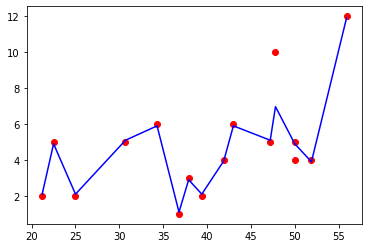

Linear


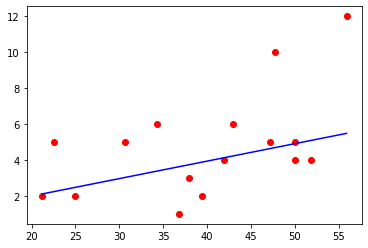

Polynomial


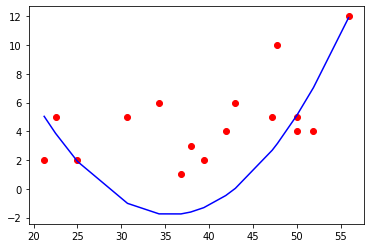

scaled


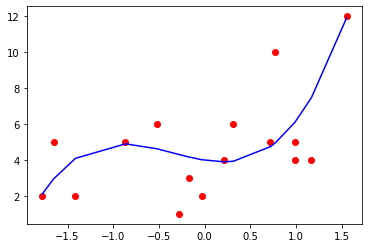

In [7]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1, coef0=1)

# #############################################################################
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

for i, elem in enumerate(svrs):
    model = elem.fit(X, y)
    y_prediction = model.predict(X)

    print(kernel_label[i])
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X, y)))
    plt.scatter(X_train_to_show, y_train_to_show, color='red')
    X_train_to_show, y_prediction = zip(*sorted(zip(X, y_prediction)))
    plt.plot(X_train_to_show, y_prediction, color='blue')
    plt.show()

svr_poly3 = SVR(kernel='poly', C=10, gamma='auto', degree=3, epsilon=.1, coef0=1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = svr_poly3.fit(X_scaled, y)
y_prediction = model.predict(X_scaled)

print("scaled")
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_scaled, y)))
plt.scatter(X_train_to_show, y_train_to_show, color='red')
X_train_to_show, y_prediction = zip(*sorted(zip(X_scaled, y_prediction)))
plt.plot(X_train_to_show, y_prediction, color='blue')
plt.show()


3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

    Según los datos de entrada, este equipo marcaría 6 goles según el modelo de regresión logística, 2 según el modelo de SVM (SVC) y 5 según Random Forest

In [8]:
df2 = df[['Goals','Goals-to-shots (%)','Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles']]
df2

,Goals,Goals-to-shots (%),Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,4,16.0,32,14,1076,42
1,4,12.9,39,21,1565,68
2,4,20.0,27,16,1298,32
3,5,17.2,40,16,1488,60
4,3,6.5,65,28,2066,76
5,10,15.6,80,35,2774,60
6,5,19.2,32,10,1187,53
7,6,7.5,110,30,3016,75
8,2,4.1,60,22,1556,49
9,2,5.2,48,14,1059,39


In [9]:
# se importan las librerías y se generan las muestras para los modelos
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

X = np.array(df2[['Goals-to-shots (%)','Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles']])
y = np.array(df2['Goals'])
X_to_predict = np.array(pd.DataFrame({'Goals-to-shots (%)':[40],'Total shots (inc. Blocked)':[102], 'Corners Taken':[5], 'Passes':[82], 'Dribbles':[23]}))

In [10]:
# análisis del modelo de regresión logística
model = linear_model.LogisticRegression(max_iter=100, class_weight='balanced') # Máximo número de operaciones =50000
model.fit(X,y)
print(model.score(X,y))

y_pred = model.predict(X)
print(confusion_matrix(y,y_pred))

# se predice el valor 
y_topredict = model.predict(X_to_predict)
y_topredict

0.875
[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 2 1 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([6], dtype=int64)

In [11]:
# análisis del modelo SVC
from sklearn import svm

model_svc = svm.LinearSVC(C=1, max_iter=1000)
model_svc.fit(X, y)
print ('score:', model_svc.score(X, y))

y_pred = model_svc.predict(X)
print(confusion_matrix(y,y_pred))

# se predice el valor 
y_topredict = model_svc.predict(X_to_predict)
y_topredict

score: 0.375
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [1 0 0 2 0 1 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]]
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([2], dtype=int64)

In [15]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold # RepeatedStratifiedKFold sólo se utiliza para categorías 
from sklearn.ensemble import RandomForestClassifier

# define the model
model_batches = RandomForestClassifier(n_estimators=100)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=2)
n_scores = cross_val_score(model_batches, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

model_batches.fit(X,y)
y_pred = model_batches.predict(X)
print(confusion_matrix(y,y_pred))
print(model_batches.score(X,y))

# se predice el valor 
y_topredict = model_batches.predict(X_to_predict)
y_topredict

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
Accuracy: 0.208 (0.093)
[[1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
1.0


array([5], dtype=int64)